# Desafio LightHouse Indicium - Ciência de dados
<b>Nome:</b> Fábio Dias Rezende Carvalho </br>
<b>E-mail:</b> fabior.carvalho@hotmail.com </br>
O seguinte relatório tem por objetivo avaliar meus conhecimentos sobre  a  resolução  de  problemas  de  negócios,  análise  de  dados  e  aplicação  de  modelos preditivos.

## Desafio
Considerando que trabalho para a Indicium, eu fui  alocado  em  um  time que trabalhará para um estúdio de Hollywood chamado  PProductions, e agora devo fazer uma análise em cima de um banco de dados cinematográfico para orientar qual tipo de filme deve ser o próximo a ser desenvolvido.

#### Entregas
<ul>
  <li><b>Análise exploratória:</b> demonstrando as principais características entre as variáveis e apresentando algumas hipóteses
relacionadas.</li>
  <li><b>Responder as seguintes perguntas:</b> 
  <ul>
    <li>Qual filme eu recomendaria para uma pessoa que eu não conheço?</li>
    <li>Quais são os principais fatores que estão relacionados com alta expectativa de faturamento de um filme?</li>
    <li>Quais insights podem ser tirados com a coluna Overview? É possível inferir o gênero do filme a partir dessa coluna?</li>
  </ul></li>
  <li><b>Nota do IMDB:</b> Como fazer a previsão da nota do IMDB com base nos dados? Quais variáveis e/ou suas transformações eu utilizei e por quê? Qual tipo de problema estou resolvendo (regressão, classificação)? Qual modelo melhor se aproxima dos dados e quais seus prós e contras? Qual medida de performance do modelo foi escolhida e por quê?</li>
  <li><b>Sugestão de nota: </b>Analisar um filme estipulado no desafio e estimar a sua nota no IMDB baseado nas caracteristicas dadas.</li>
  <li><b>Modelo: </b>Deve ser entregue no formato '.pkl'.</li> 
</ul>

# Exploraçao de dados

In [1464]:
import pandas as pd
import matplotlib.pyplot as plt

dados = pd.read_csv('dados/desafio_indicium_imdb.csv')
dados.head()

,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
1,2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
2,3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
3,4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
4,5,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"


In [1465]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     999 non-null    int64  
 1   Series_Title   999 non-null    object 
 2   Released_Year  999 non-null    object 
 3   Certificate    898 non-null    object 
 4   Runtime        999 non-null    object 
 5   Genre          999 non-null    object 
 6   IMDB_Rating    999 non-null    float64
 7   Overview       999 non-null    object 
 8   Meta_score     842 non-null    float64
 9   Director       999 non-null    object 
 10  Star1          999 non-null    object 
 11  Star2          999 non-null    object 
 12  Star3          999 non-null    object 
 13  Star4          999 non-null    object 
 14  No_of_Votes    999 non-null    int64  
 15  Gross          830 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 125.0+ KB


Nosso conjunto de dados trás diversas informações em cada coluna que serão descritas abaixo, mas antes gostaria de chamar a atenção para os valores faltantes dentro do nosso conjunto de dados, uma vez que quase todas as colunas possuem 999 valores, exceto as colunas 'Certificate' (898), 'Meta_score' (842) e 'Gross' (830) possuem valores faltantes que serão trabalhados mais a frente. </br>
Traduzindo nosso conjunto de dados encontramos:
<ul>
<li><b>Series_title</b>: Nome do filme;</li>
<li><b>Released_Year</b>: Ano de lançamento do filme;</li>
<li><b>Certificate</b>: Classificação etária do filme;</li>
<li><b>Runtime</b>: Tempo de duração do filme;</li>
<li><b>Genre</b>: Gênero do filme;</li>
<li><b>3IMDB_Rating</b>: Nota no IMDB do filme;</li>
<li><b>Overview</b>: Descrição geral do filme;</li>
<li><b>Meta_score</b>: Média ponderada de todas as críticas do filme;</li>
<li><b>Director</b>: Diretor do filme;</li>
<li><b>Star1</b>: Ator/atriz #1 do filme;</li>
<li><b>Star2</b>: Ator/atriz #2 do filme;</li>
<li><b>Star3</b>: Ator/atriz #3 do filme;</li>
<li><b>Star4</b>: Ator/atriz #4 do filme;</li>
<li><b>No_of_Votes</b>: Número de votos que o filme teve;</li>
<li><b>Gross</b>: Faturamento do filme.</li>
</ul>

### Trabalhando os dados faltantes e os tipos de dados
Para evitar perder informações do nosso conjunto de dados farei uma abordagem de complementar os valores faltantes nas colunas. Para os valores faltantes dentro das colunas 'meta_score' e da coluna 'Gross' eu substituirei os valores faltantes pelo valor médio dessas colunas obtidos dentro do nosso conjunto de dados. Para a coluna 'Certificate' eu tomarei as decisões mais a frente, uma vez que ela possui diversos valores possiveis dentro dos dados.

Também vou remover a coluna chamada 'unnamed: 0', pois não será utilizada na nossa análise.

In [1466]:
dados = dados.drop(columns='Unnamed: 0')
#removendo a coluna desnecessária

dados.Certificate.unique()
#observar os valores únicos

array(['A', 'UA', 'U', 'PG-13', 'R', nan, 'PG', 'G', 'Passed', 'TV-14',
       '16', 'TV-MA', 'Unrated', 'GP', 'Approved', 'TV-PG', 'U/A'],
      dtype=object)

Agora vou modificar o tipo de dado da minha coluna 'Released_Year', passando de object para inteiro, nao trabalharei com ele diretamente como data.

In [1467]:
dados['Released_Year'] = pd.to_numeric(dados['Released_Year'], errors='coerce', downcast='integer')
dados.dropna(subset=['Released_Year'], inplace=True)
#remoção de um dos dados com problema

dados['Released_Year'] = dados['Released_Year'].astype('int')
#mudando o tipo de dado e substituindo no meu dataframe

Aqui um dos valores do conjunto de dados apresenta um problema apos a transformação, entao ele foi removido do conjunto do dataframe. 

A coluna 'Runtime', que indica o tempo de duração, também será transferido para valor inteiro e a coluna será alterada para o nome de 'Runtime_min', indicando que a duração dos filmes está em minutos e removendo os 'min' que eram encontrados em cada linha.

In [1468]:
dados['Runtime'] = dados['Runtime'].str.replace(' min', '').astype(int)
dados = dados.rename(columns={'Runtime': 'Runtime_min'})
#modificando o tipo de dado e alterando o nome da minha coluna para algo mais descritivo

Abaixo faço a modificação do 'cross', faturamento, modificando o tipo 'object' para valor numerico.

In [1469]:
dados['Gross'] = dados['Gross'].str.replace(',','')
dados['Gross'] = pd.to_numeric(dados['Gross'], errors='coerce')
#passando cross para o valor numerico

Agora vou substituir pelo valor médio do meu conjunto de dados nas linhas faltantes de 'Meta_score' e 'Gross',  apesar de existirem outras abordagens para tratar dados faltantes meu objetivo aqui é trabalhar da melhor forma para obter a maior quantidade possivel de dados sem prejudicar as informações.


In [1470]:
media_score = dados.Meta_score.mean()
media_gross = dados.Gross.mean()
#pegando os valores medios das colunas

dados.Meta_score = dados.Meta_score.fillna(media_score)
dados.Gross = dados.Gross.fillna(media_gross)
#substituindo com os valores medios de cada valor vazio

print(dados[['Meta_score', 'Gross']].isnull().sum())
#verificando se ainda existem valores vazios, se der diferente de zero ainda existem

Meta_score    0
Gross         0
dtype: int64


In [1471]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 998 entries, 0 to 998
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   998 non-null    object 
 1   Released_Year  998 non-null    int64  
 2   Certificate    897 non-null    object 
 3   Runtime_min    998 non-null    int64  
 4   Genre          998 non-null    object 
 5   IMDB_Rating    998 non-null    float64
 6   Overview       998 non-null    object 
 7   Meta_score     998 non-null    float64
 8   Director       998 non-null    object 
 9   Star1          998 non-null    object 
 10  Star2          998 non-null    object 
 11  Star3          998 non-null    object 
 12  Star4          998 non-null    object 
 13  No_of_Votes    998 non-null    int64  
 14  Gross          998 non-null    float64
dtypes: float64(3), int64(3), object(9)
memory usage: 124.8+ KB


Agora meu conjunto de dados está mais organizado e limpo, melhorando a qualidade das informações e permitindo que eu avance nos objetivos do projeto.

### Observando os valores dos dados
Agora vou análisar a distribuição de valores dos nossos conjuntos de dados. Antes de fazer isso eu vou fazer uma pequena modificação no 'Meta_score', que são as notas dos criticos, deixando eles de 0 a 10 como as notas que vieram do IMDB, facilitando uma comparação entre as notas do IMDB e as notas dos criticos. 

In [1472]:
dados.Meta_score = dados.Meta_score/10
# colocando os valores da nota de 0 a 10, assim como as notas do IMDB

dados.describe()

,Released_Year,Runtime_min,IMDB_Rating,Meta_score,No_of_Votes,Gross
count,998.000000,998.000000,998.000000,998.000000,9.980000e+02,9.980000e+02
mean,1991.214429,122.854709,7.948297,7.797027,2.716239e+05,6.795500e+07
std,23.308539,28.110078,0.272203,1.137323,3.210735e+05,1.000734e+08
min,1920.000000,45.000000,7.600000,2.800000,2.508800e+04,1.305000e+03
25%,1976.000000,103.000000,7.700000,7.200000,5.541675e+04,5.010758e+06
50%,1999.000000,119.000000,7.900000,7.797027,1.381685e+05,4.238945e+07
75%,2009.000000,136.750000,8.100000,8.575000,3.735062e+05,6.795500e+07
max,2020.000000,321.000000,9.200000,10.000000,2.303232e+06,9.366622e+08


Aqui vemos que a distribuição de notas do imdb, dada na coluna 'IMDB_Rating', varia suas notas de 0 a 10, entretanto nosso conjunto de dados concentra a menor nota no valor de 7.6 e a maior sendo 9.2, mas a concentração de 75% dos valores ocorre nota 8.1 para baixo. Colocarei um plot do histograma dessas notas abaixo para ter uma visualização como apoio para essa afirmação.


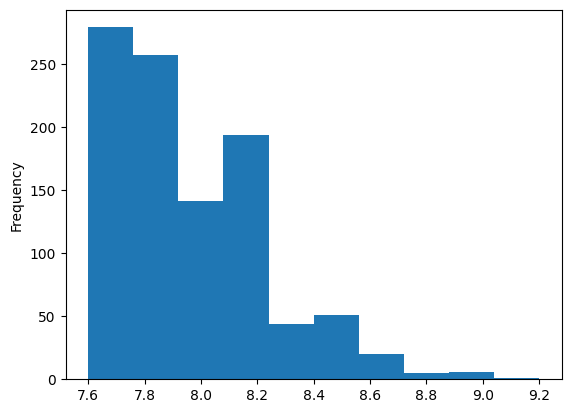

In [1473]:
dados.IMDB_Rating.plot(kind='hist');

<Axes: >

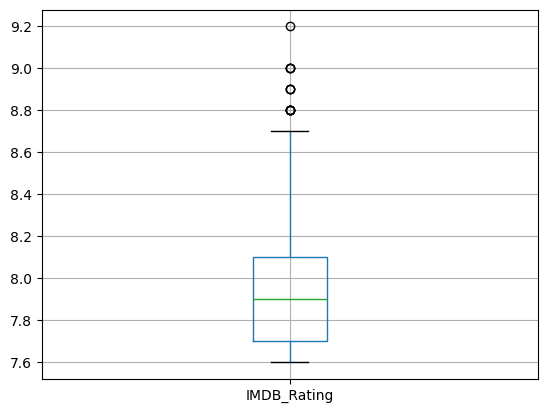

In [1474]:
dados[['IMDB_Rating']].boxplot()

Essa coluna mostra como nosso conjunto de dados esta inviezado quando o assunto é notas, uma vez que todos as notas apresentam valores acima de 7.6 e 75% deles abaixo de 8.1 (ou seja, 75% das notas estão presentes em 0.5 pontos de variação apenas, apenas 5% do valor máximo dentro dessa coluna), também observa-se grande concentração de notas abaixo de 50%, que variam só 0.3 na notas totais, o que é bem baixo. No geral essa coluna apresenta valores bem elevados para os filmes. Também fica claro a presença de alguns outliers dentro do nosso conjunto de dados, mesmo sendo relativamente poucos eles ainda podem influenciar nosso modelo de ML, então falaremos sobre os outliers observados novamente na hora do desenvolvimento do modelo pedido.

A coluna 'Meta_score', trazendo uma maior abrangência de valores de notas, variando de 28 até 100 as notas dos criticos. Para uma visualização melhor e normalização da proporção das notas de pessoas do IMDB e da critica especilizada eu coloquei as notas dos criticos de 0 a 10, mantendo a proporção.

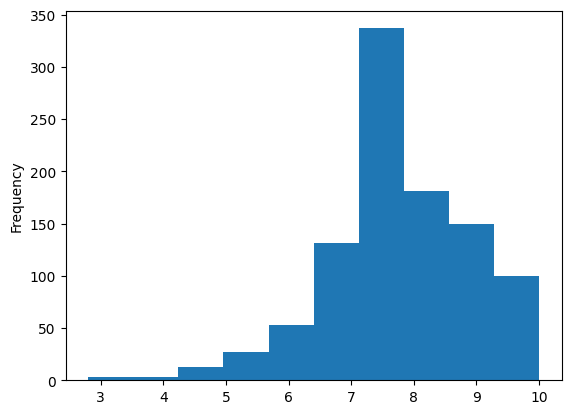

In [1475]:
dados.Meta_score.plot(kind='hist');

<Axes: >

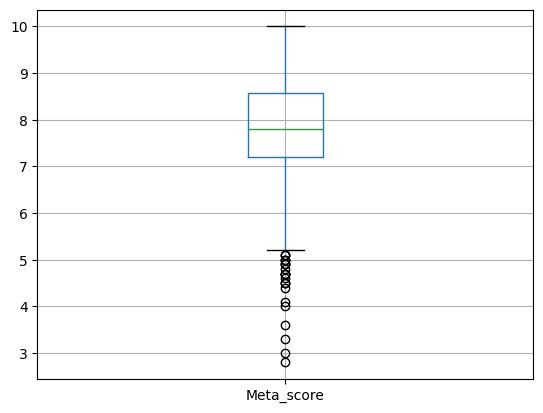

In [1476]:
dados[['Meta_score']].boxplot()

Aqui encontrei uma maior gama de variedade de notas vindas dos criticos, sendo uma concentração de notas onde 75% das notas estão abaixo de 8,5 e 25% dos dados estão abaixo de 7,2 (aqui a variação das notas abaixo dos 75% é de 5.7 pontos, bem mais abrangente que as notas do IMDB). Apesar da maior variação de notas, ainda econtramos uma maior concentração dos dados em uma faixa de notas próximas ao do IMDB, entretanto os outliers dessa vez se encontram nos filmes com notas muito baixas, isso indica que no geral as pessoas tendem a estipular notas para os filmes dentro dessa faixa média, nem sendo muito bons ou muito ruins, valendo essa concentração tanto para pessoas no geral como para criticos, mas os criticos possuem uma maior tendencia a darem notas mais baixas para filmes que eles consideram realmente ruins, por isso os outliers mais baixos no nosso conjunto de dados. A maior faixa dentro das notas dos criticos permite uma maior variabilidade.

Com essa noção geral das notas dos filmes outro valor relevante dentro do conjunto de dados é o  'Gross' de cada filmes, ou seja, como descrito mais acima desse relatório, seria o faturamento dos nossos filmes.

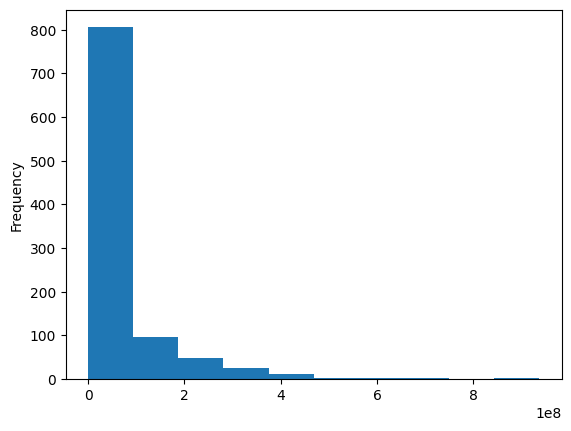

In [1477]:
dados.Gross.plot(kind='hist');

No gráfico acima temos a maior concentração de lucro dos filmes sendo abaixo dos 100 milhoes, onde quase 800 casos dos 998 estão nessa faixa de valor, e 900 casos abaixo dos 200 milhões,trazendo outliers para esse dado e também indicando que a maioria dos filmes não consegue grandes bilheterias e existem grandes chances de o filme que está sendo trabalhado cair dentro desse lucro para a empresa. Para termos uma visão um pouco mais aprimorada sobre esse fator podemos observar a matriz de correlação da nossa coluna de faturamento assim como um boxplot.

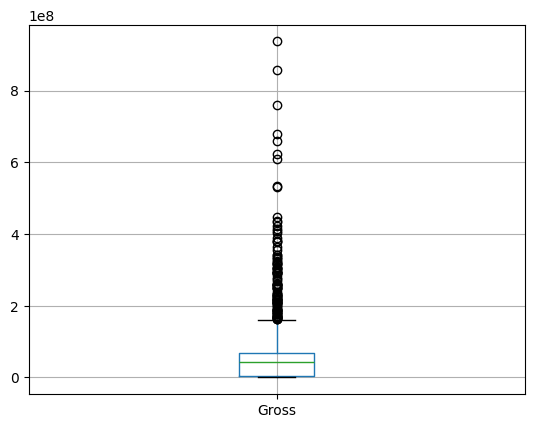

In [1478]:
dados[['Gross']].boxplot();

Aqui no boxplot fica perceptivel que como filmes que lucram mais de 180 milhões aproximadamente já são considerados outliers dentro da nossa amostra, na prática isso quer dizer que a empresa que busca o investimento deve estar ciente do risco e do investimento elevado em um filme trás.

## As questões definidas pelo desafio

#### Qual filme você recomendaria para uma pessoa que você não conhece?

A nossa primeira pergunta é sobre uma indicação de filme para alguém que nao conhecemos. Podemos iniciar o raciocionio dessa resposta excluindo fatores menos relevantes para indicação de um filme, que no caso o número de votos pode ser retirado, pois o número de votos não influencia na qualidade ou na atração que alguém pode sentir para assistir um filme, o mesmo vale para o faturamento direto do filme, que pode ser removido pois, no geral, as pessoas não pensam em faturamento na escolha do filme. Entretanto todo o restante pode ser elencado, por exemplo o tempo do filme caso a pessoa queira, a classficação etária e assim em diante.

Sobre o que pode dizer mais a respeito do filme que vou indicar acredito que o melhor caminho é uma análise das notas, podemos até fazer uma coluna extra com a média das notas de todos os filmes levando em conta a nota do IMDB e a nota dos criticos, como eu eu deixei eles na mesma base, de zero a dez, posso fazer a nota média entre essas colunas e encontram um novo valor para cada filme, excluindo assim os filmes tidos como ruins pela critica e bons pelos votos do IMDB. Isso também possibilita até um valor ponderado, por exemplo, se eu quiser levar um peso duas vezes maior dos votos do IMDB, ou dos criticos, e fazer uma média nessa proporção, mas no caso so farei o valor médio.

O outro ponto relevante é o genero do filme que essa pessoa gosta, existem diversos generos diferentes no nosso conjunto de dados e isso é extremamente relevante para a pessoa gostar do filme. As estrelas do filme são o que a pessoa procura? O diretor que sempre coloca sua assinatura no filme que a pessoa gosta? Para responder essas perguntas existem muitos caminhos, mas podemos separar nosso conjunto de dados com base nesses raciocionios e deixaremos um menor número de opções, facilitando a escolha do filme dentro desse conjunto de dados pré selecionados.

In [1479]:
indicação = dados.drop(columns=['Released_Year','Certificate', 'No_of_Votes', 'Gross'])
indicação['rating_mean'] = (indicação.IMDB_Rating + indicação.Meta_score)/2
#coluna dos valores médios da notas

indicação = indicação.loc[indicação.rating_mean > 8.0]
indicação.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375 entries, 0 to 998
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Series_Title  375 non-null    object 
 1   Runtime_min   375 non-null    int64  
 2   Genre         375 non-null    object 
 3   IMDB_Rating   375 non-null    float64
 4   Overview      375 non-null    object 
 5   Meta_score    375 non-null    float64
 6   Director      375 non-null    object 
 7   Star1         375 non-null    object 
 8   Star2         375 non-null    object 
 9   Star3         375 non-null    object 
 10  Star4         375 non-null    object 
 11  rating_mean   375 non-null    float64
dtypes: float64(3), int64(1), object(8)
memory usage: 38.1+ KB


Agora o conjunto de dados denominado 'indicação' possuo 375 opções de filmes que possuem boa nota tanto dos criticos quanto do IMDB, elevando as chances da pessoa gostar do filme, lembrando que o valor de nota 8 foi estipulado puramente em como basear a escolha em notas mais altas. Agora, respondendo a pergunta diretamente, qual o filme eu indicaria? Bom, eu deixaria organizado da maior nota para a menor e começaria indicando os filmes com maiores notas medias dos filmes.

In [1480]:
indicação_ordenado = indicação.sort_values(by='rating_mean', ascending=False)
indicação_ordenado.head(10)

,Series_Title,Runtime_min,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,rating_mean
0,The Godfather,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,10.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,9.60
3,12 Angry Men,96,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,9.6,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,9.30
49,Casablanca,102,"Drama, Romance, War",8.5,A cynical expatriate American cafe owner strug...,10.0,Michael Curtiz,Humphrey Bogart,Ingrid Bergman,Paul Henreid,Claude Rains,9.25
51,City Lights,87,"Comedy, Drama, Romance",8.5,"With the aid of a wealthy erratic tippler, a d...",9.9,Charles Chaplin,Charles Chaplin,Virginia Cherrill,Florence Lee,Harry Myers,9.20
80,Rear Window,112,"Mystery, Thriller",8.4,A wheelchair-bound photographer spies on his n...,10.0,Alfred Hitchcock,James Stewart,Grace Kelly,Wendell Corey,Thelma Ritter,9.20
30,Shichinin no samurai,207,"Action, Adventure, Drama",8.6,A poor village under attack by bandits recruit...,9.8,Akira Kurosawa,Toshirô Mifune,Takashi Shimura,Keiko Tsushima,Yukiko Shimazaki,9.20
115,Lawrence of Arabia,228,"Adventure, Biography, Drama",8.3,"The story of T.E. Lawrence, the English office...",10.0,David Lean,Peter O'Toole,Alec Guinness,Anthony Quinn,Jack Hawkins,9.15
4,The Lord of the Rings: The Return of the King,201,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,9.4,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,9.15
5,Pulp Fiction,154,"Crime, Drama",8.9,"The lives of two mob hitmen, a boxer, a gangst...",9.4,Quentin Tarantino,John Travolta,Uma Thurman,Samuel L. Jackson,Bruce Willis,9.15
6,Schindler's List,195,"Biography, Drama, History",8.9,"In German-occupied Poland during World War II,...",9.4,Steven Spielberg,Liam Neeson,Ralph Fiennes,Ben Kingsley,Caroline Goodall,9.15


Acima encontra-se os 10 filmes com as maiores notas médias do nosso conjunto de dados, olharia essa imagem combinada com o gênero que a pessoa mais gosta e indicaria um filme, agora olhando só pela questão das médias das notas encontradas nos filmes no caso a indicação seria 'The GodFather', que por sinal é um filme excelente.

### Quais são os principais fatores que estão relacionados com alta expectativa de faturamento de um filme?
Podemos anãliser no nosso relatório a matriz de correlação dos nossos dados.

In [1481]:
dados.corr()

,Released_Year,Runtime_min,IMDB_Rating,Meta_score,No_of_Votes,Gross
Released_Year,1.000000,0.165765,-0.133257,-0.289292,0.246005,0.192991
Runtime_min,0.165765,1.000000,0.243778,-0.027878,0.172520,0.124410
IMDB_Rating,-0.133257,0.243778,1.000000,0.256229,0.479691,0.094443
Meta_score,-0.289292,-0.027878,0.256229,1.000000,-0.019249,-0.030785
No_of_Votes,0.246005,0.172520,0.479691,-0.019249,1.000000,0.563944
Gross,0.192991,0.124410,0.094443,-0.030785,0.563944,1.000000


Aqui temos uma forte influencia do número de votos com o faturamento, ou seja, o filme mais visto foi votado muitas vezes, tendo um valor de 0.56, podendo variar de -1, influência diretamente negativa, e mais 1, influência diretamente positiva. Como o filme foi votado muitas vezes ele foi o mais visto, logo teve a maior bilheteria e o maior faturamento.

Outros pontos que influenciam nosso faturamento é o ano de lançamento, podemos dar uma olhada nos últimos anos de lançamento do nosso conjunto de dados e buscar uma ideia do comportamento dos filmes recentes dentro do nosso conjunto de dados. Fazendo uma consulta rapida do último ano de lançamento do conjunto de dados temos que o último ano é de 2020,trabalharei do periodo de 2014 até 2020 para termos uma ideia dos lucros desse periodo, que considero uma análise do periodo recente dos filmes, uma vez que não podemos lançar um filme no passado, obviamente.

In [1482]:
filtered_time = dados.loc[dados['Released_Year'] > 2014]
print(filtered_time.Gross.mean())

113564978.14148694


Aqui temos que o faturamento médio dos últimos anos dos filmes lançados, de 2014 até 2020, foi de 113 milhões, o que está dentro da nossa análise e que trás uma idéia do valor médio que a empresa pode estipuar dentro do seu faturamento. Um periodo um pouco mais recente seria melhor, mas já temos uma boa noção do comportamento do lucro dos filmes recentes.

A terceira maior influência dos valores de faturamento dos filmes é o tempo de duração que o filme tem, isso pode auxiliar a empresa a estipular um tempo de duração para conseguir ser mais acertiva em um bom lucro.

129.08641975308643
26.19643782662214


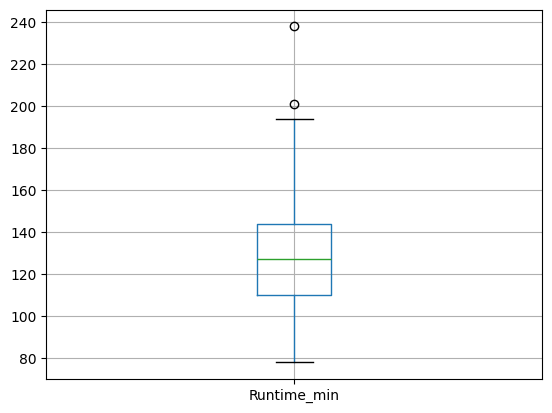

In [1483]:
filtered_gross = dados.loc[dados['Gross'] > 113000000.00]
#113 milhoes de filtro pois é o valor médio estipulado a cima

print(filtered_gross.Runtime_min.mean())
print(filtered_gross['Runtime_min'].describe()['std'])

filtered_gross[['Runtime_min']].boxplot();

Aqui tem-se que o filmes com maiores faturamentos, acima dos 113 milhões, possuem aproximadamemnte 2 horas a 2 horas e 10 minutos, indicando que essa é a média de tempo estipulado para o filme que será produzido. Nossa coluna de tempo de filme possui uma variação de erro de tempo de 26 minutos, então o ideal é que o filme esteja na faixa de 103 minutos até 155 minutos, mas próximo aos 129 minutos.

Um outro raciocinio dentro desse mesmo filtro é o questionamento de que se os filmes com maior faturamentos possuem maiores notas médias, tanto pelo IMDB quanto pelo voto dos criticos.

In [1484]:
print(filtered_gross.IMDB_Rating.mean())
print(filtered_gross.Meta_score.mean())

8.008024691358024
7.680246913580246


Apesar de um maior faturamento os dados se concentram dentro daquelas lacunas citadas mais acima no nosso projeto, tanto para as notas do IMDB quanto para as notas dos criticos, mostrando que não existe uma relação definida com o lucro dos filmes e suas notas.

Ainda outro fator interessante que podemos analisar para demostrar para a empresa é aplicar um filtro acima dos 113 milhões e os filmes mais recentes, buscando quais os generos desses filmes que mais aparecem quando estamos falando de alto lucro do nosso conjunto de dados nos últimos anos (também podemos observar os generos no geral com poucas alterações do código abaixo, trocando o filtro pelo conjunto de dados total).

In [1485]:
filtered_gross_year = dados.loc[(dados['Gross'] > 113000000.00) & (dados['Released_Year'] > 2014)]
dados_genre = filtered_gross_year['Genre'].str.split(',')
dados_genre = dados_genre.apply(lambda genres: [genre.replace(' ', '') for genre in genres])
genre_count = dados_genre.explode().value_counts()
print(genre_count)

Adventure    20
Action       17
Drama        16
Comedy       11
Animation     7
Sci-Fi        7
Thriller      4
Biography     4
Music         3
History       3
Crime         2
Family        2
War           1
Horror        1
Mystery       1
Romance       1
Name: Genre, dtype: int64


Aqui temos que o maiores gêneros nos filmes mais lucrativos são Aventura (20 filmes), ação (17 filmes), drama (16 filmes) e comédia (11 filmes), então esses são os gêneros que foram mais lucrativos e mais apareceram desde 2014 até 2020. Importante lembrar também que esses filmes apresentam mais de um gênero por filme na maioria das vezes, por isso os varios valores dentro do conjunto de dados, então devemos ter em mente que esse são os principais tipos de filmes com maiores lucros nos ultimos anos dentro do nosso conjunto de dados.

### Insights da coluna Overview
Quais insights nessa coluna eu consigo observar? É possísvel inferir o genêro do filme a partir dessa coluna?

Bom, a coluna overview é uma coluna object que traz a descrição dos filmes.

In [1486]:
overview = dados[['Series_Title','Genre','Overview']]
overview.head()

,Series_Title,Genre,Overview
0,The Godfather,"Crime, Drama",An organized crime dynasty's aging patriarch t...
1,The Dark Knight,"Action, Crime, Drama",When the menace known as the Joker wreaks havo...
2,The Godfather: Part II,"Crime, Drama",The early life and career of Vito Corleone in ...
3,12 Angry Men,"Crime, Drama",A jury holdout attempts to prevent a miscarria...
4,The Lord of the Rings: The Return of the King,"Action, Adventure, Drama",Gandalf and Aragorn lead the World of Men agai...


Aqui temos uma dataframe chamado overview que possibilita analisarmos o texto descritivo com os generos que aparecem para cada filme e o seu nome. O primeiro raciocionio para analisarmos se existe correlação no genêro com a descrição do filme podemos simplesmente comparar as palavras que estão gênero e a que estão dentro da descrição.

In [1487]:
def processar_genero(genero):
    return {palavra.strip().lower() for palavra in genero.split(', ')}
    #coloca a palavra vazia e sem o espaço

def verifica_palavras_na_overview(row):
    palavras_gênero = set(processar_genero(row['Genre']))
    palavras_overview = set(row['Overview'].split())
    #remove o espaço vazio com o strip e separa as palavras
    return len(palavras_gênero & palavras_overview) > 0
    #conta as ocorrencias para o calculo de acerto das palavras entre as duas colunas

df_copy = overview.copy()
#fazendo uma copia para prevenção de erros

df_copy['Corresponde'] = df_copy.apply(verifica_palavras_na_overview, axis=1)
# Aplicando a função em 'Genre'

total_linhas = len(df_copy)
linhas_correspondentes = df_copy[df_copy['Corresponde']].shape[0]
porcentagem = (linhas_correspondentes / total_linhas) * 100
# Calculando a porcentagem na cópia do DataFrame

print(f"{porcentagem:.2f}% das palavras dentro de gênero estão na coluna overview")


4.91% das palavras dentro de gênero estão na coluna overview


Analisando diretamente as palavras de genero com as palavras dentro do overview percebemos uma baixa incidencia da palavra diretamente na coluna seguinte, atingindo apenas 5% dos casos. Aqui precisariamos de algum trabalho mais robusto para uma análise mais profunda da comparação entre essas duas colunas, provavelmente a aplicação de uma NLP seria um bom caminho a ser seguido (nas considerações finais desse relatório eu descrevo mais sobre isso).

## Previsão das notas do IMDB
Agora farei o terceiro passo do projeto que é o desenvolvimento de um algoritmo de machine Learning para as notas do IMDB, mas antes de irmos direto ao código vou responder as questões teóricas primeiro.

* <b>Quais variáveis e/ou suas transformações você utilizou e por quê?: </b> as principais variaveis que irei utilizar são as notas do IMDB, pois será meu target, o ano de lançamento, o tempo de duração, a nota dos criticos, o numero total de votos e o lucro final. Todos são valores númericos dentro do meu conjunto de dados, sendo que a nota dos criticos eu efetuei uma divisão por 10 para deixar na mesma escala das notas do IMDB.
* <b>Qual tipo de problema estamos resolvendo (regressão, classificação)?: </b> No caso desse problema estamos desenvolvendo uma solução de regressão, pois estamos utilizando os nossos dados estruturados para encontrar um valor numérico especifico utilizando valores númericos da coluna de notas do IMDB. Modelos de classificação seriam focados em colocar labels nos filmes e agrupa-los por caracteristicas especificas dentro do conjunto de dados, aplicando algum modelo que calcularia a distancia de cada ponto que um filme representa e agrupando os mais próximos em um mesmo label, que não é o caso, pois buscamos um valor númerico especifico.
* <b>Qual modelo melhor se aproxima dos dados e quais seus prós e contras?: </b> Estou testando três modelos de regressao linear, um do scikt learn, outro do statsmodel e outro modelo da decisionTreeClassifier. Os modelos de SckitLearn e StatsModel possuem robustes e são amplamente empregados em rergressão linear, senedo possivel aplicar ainda análise de valores estatisticos no processo, entretanto eles pressupoem que a variação de valores é linear, são sensiveis a outliers. DecisionTree cria arvores de decisões para o modelo, sendo flexivel e robusto (suporta bem outiliers), mas pode ter oveerfiting e responder mal a variação de dados bruscas.
* <b>Qual medida de performance do modelo foi escolhida e por quê?: </b> A medida de performance do nosso conjunto de dados será RMSE (root mean square error - raiz quadrada dos valores médios dos erros), pois esse modelo apresenta resultados interessantes para esse medidor dentro do nosso contexto, principalmente por não termos grandes presenças de outliers dentro das notas do IMDB (apresentam apenas três valores que serão removidos para maior precisão do modelo).

### Desenvolvendo o modelo de machine learning
Analisando o conjunto de dados percebemos que ele possue poucos outliers dentro do nossos parametros, que podem ser removidos, entretanto ele possue uma distribuição de dados não muito adequada.

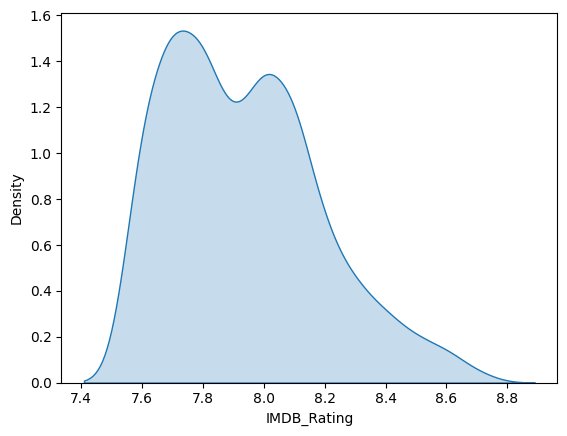

In [1488]:
import seaborn as sns

dados = dados.loc[dados['IMDB_Rating'] <= 8.7]
#remoçao dos outliers

sns.kdeplot(data=dados['IMDB_Rating'], fill=True);


Alta concentração de dados na esquerda da distribuição.

<Axes: >

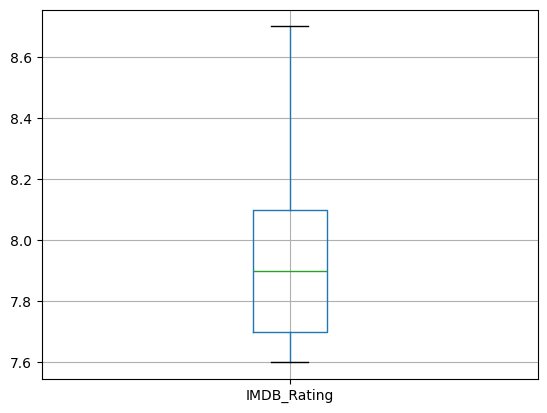

In [1489]:
dados[['IMDB_Rating']].boxplot()

Bom, como visto anteriormente nossos dados possuem outliers, entretanto apenas 3 valores, mas ele possue uma tendencia a concentrar os dados, que será trabalhado logo menos antes de treinarmos nosso modelo. Antes disso, podemos fazer uma tentativa de estipular uma nova variavel no nosso conjunto de dados, na verdade eu estou pensando em duas variaveis novas, onde elas se baseam nas medias das notas entre os criticos e as notas do IMDB. A possibilidade é que essas notas combinadas podem gerar bons atributos que podem auxiliar no desenvolvimento de um modelo mais preciso.

In [1490]:
dados.corr()['IMDB_Rating'].sort_values(ascending=False)

IMDB_Rating      1.000000
No_of_Votes      0.381739
Meta_score       0.236724
Runtime_min      0.203212
Gross            0.047004
Released_Year   -0.139578
Name: IMDB_Rating, dtype: float64

Agorar, vou treinar meu modelo de machine learning com o conjunto de dados, entretanto irei averiguar algumas possibilidades dentro de diferentes modelos.

### Treinando os modelos e utilizando o RMSE
<b>Importante:</b> eu havia citado isso acima no relatório, mas para deixar claro eu irei trabalhar com o RMSE como base de comparação entre os modelos, isso se deve ao fato de termos poucos outliers dentro do nosso conjunto de dados no alvo target, que no caso é a notas do IMDB.

Outro ponto relevante é que as notas do IMDB_rating variam do minimo de 7.6 e do máximo 9.2, ou seja, a taxa máxima de variação é de apenas 1.6 pontos, esse valor vai permitir o calculo de porcentagem do erro dos nossos dados baseado no RMSE, que serão calculado a cada novo modelo. Também colocarei a SEED aqui no topo para ela ser aplicada em todos os modelos.



#### Modelo do sckit_learn

In [1491]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

In [1492]:
SEED = 42

y = dados['IMDB_Rating']
X = dados.drop(columns = ['Series_Title', 'Certificate','Genre','IMDB_Rating','Overview','Director','Star1','Star2','Star3','Star4'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

In [1493]:
modelo_sckit = LinearRegression()
modelo_sckit.fit(X_train, y_train)

LinearRegression()

In [1494]:
modelo_sckit_pre = modelo_sckit.predict(X_test)

In [1495]:
variacao = 1.6

rmse_sckit = np.sqrt(mean_squared_error(y_test, modelo_sckit_pre))
print(f'RMSE: {rmse_sckit}')
print(f'Desempenho do modelo sckit_learn: {round((rmse_sckit/variacao)*100,2)}% - erro médio da amplitude total do conjunto das notas')

RMSE: 0.19720819651525187
Desempenho do modelo sckit_learn: 12.33% - erro médio da amplitude total do conjunto das notas


#### Modelo usando StatsModel

Aqui vou refazer alguns dos passos para organização e melhor controle do codigo, apesar de não ser recomendado a repetição de código.

In [1496]:
import statsmodels.api as sm

#y = dados['IMDB_Rating']
#X = dados.drop(columns = ['Series_Title','IMDB_Rating', 'Certificate','Genre','Overview','Director','Star1','Star2','Star3','Star4'])
X = sm.add_constant(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

In [1497]:
modelo_s= sm.OLS(y_train, X_train)
modelo_stats = modelo_s.fit()

In [1498]:
print(modelo_stats.summary())

                            OLS Regression Results                            
Dep. Variable:            IMDB_Rating   R-squared:                       0.336
Model:                            OLS   Adj. R-squared:                  0.332
Method:                 Least Squares   F-statistic:                     79.09
Date:                Wed, 17 Jul 2024   Prob (F-statistic):           3.66e-67
Time:                        20:27:41   Log-Likelihood:                 114.52
No. Observations:                 788   AIC:                            -217.0
Df Residuals:                     782   BIC:                            -189.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            11.6030      0.720     16.107

Aqui vou aproveitar e fazer a análise das variaveis e dos valores do 'sm', onde encontramos todos os valores das variaveis como zero, o que nos permite afirmar que todas as variaveis são relevantes dentro do nosso conjunto de dados e do treinamento do modelo (importante observar os valores individuais de cada variavel).

Agora vamos ao RMSE do statsmodel.



In [1499]:
y_pred = modelo_stats.predict(X_test)
rmse_statsmodels = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'RMSE: {rmse_statsmodels}')
print(f'Desempenho do modelo sckit_learn: {round((rmse_statsmodels/variacao)*100,2)}% - erro médio da amplitude total do conjunto das notas')


RMSE: 0.19720819651273117
Desempenho do modelo sckit_learn: 12.33% - erro médio da amplitude total do conjunto das notas


#### Modelo utilizando o DecisionTreeClassifier

In [1500]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

In [1501]:
y = dados['IMDB_Rating']
X = dados.drop(columns = ['Series_Title','IMDB_Rating', 'Certificate','Genre','Overview','Director','Star1','Star2','Star3','Star4'])
#refazendo X e y por causa da constante usada no 'SM'

X_train_tree, X_test_tree, y_train_tree, y_test_tree = train_test_split(X, y, test_size=0.2, random_state=SEED)

In [1502]:
modelo_decision_tree = DecisionTreeRegressor(random_state=SEED)
modelo_decision_tree.fit(X_train_tree, y_train_tree)

DecisionTreeRegressor(random_state=42)

In [1503]:
y_pred = modelo_decision_tree.predict(X_test_tree)

rmse_tree = np.sqrt(mean_squared_error(y_test_tree, y_pred))
print(f'RMSE: {rmse_tree}')
print(f'Desempenho do modelo sckit_learn: {round((rmse_tree/variacao)*100,2)}% - erro médio da amplitude total do conjunto das notas')

RMSE: 0.23028309323591914
Desempenho do modelo sckit_learn: 14.39% - erro médio da amplitude total do conjunto das notas


### Os valores do RMSE dos modelos
A métrica RMSE foi escolhida para termos uma base de comparação entre os diferentes modelo, onde o RMSE zero indicaria uma precisao perfeita, sem erros, pois a raiz quadrada média dos erros dando zero seria zero.
* <b>Modelo do SckitLearn -</b> Esse modelo possui um RMSE de 0.197, onde vale ressaltar que um desempenho de 12.33% é um bom desempenho, levando em conta nossa métrica a variação total do nosso target ser de 1.6. Lembrando também que essa é uma biblioteca mais voltada ao desenvolvimento de modelos de machine learning, mas também possue forte parte estatistica.

* <b>Modelo do StatsModel -</b> Esse modelo possui um RMSE de 0.197, mesmo desempenho do modelo do SckitLearn,com o  desempenho de 12.33% equivalente. Lembrando que essa é uma biblioteca mais voltada para desenvolvimento estatistico e analise.

Por que isso acontece? Bom, as bibliotecas python possuem algumas similaridades dentro do seu desenvolvimento, como estou utilizando o desenvolvimento de modelos de regressão linear baseado nas bibliotecas e seus padrões pode acontecer de termos resultados similares, que é o nosso caso.

* <b>Modelo do DecisionTree -</b> Esse modelo possui um RMSE de 0.23, com o  desempenho de 14.39%, ou seja, atinge uma variação maior, logo um dos dois modelos anteriores é mais indicado.

Definido os valores e comparações dos modelos eu optei por trabalhar com o modelo do <b>SckitLearn</b>.

### Salvando o modelo em '.pkl' e fazendo a previsão.

In [1504]:
filme = np.array([[1994, 142, 8, 2343110, 28341469]])
#Atenção, lembrar que eu fiz a divisao por 10 das notas dos criticos, aplicar isso na previsao 

modelo_sckit.predict(filme)

/home/fabio/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([9.05122711])

Aqui a previsão do nosso filme é que ele obtenha uma nota de 9.05, lembrando que temos um erro aproximado de 0.197 dentro do nosso modelo treinado, dado pelo RMSE, ou seja, o filme tem uma variação de nota de 8.85 até 9.24 (sendo que 9.2 é o máximo que encontramos dentro do conjunto de dados, ou seja, passa do limite da nota maxima do nosso conjunto de dados). Aqui é importante ressaltar que a notas dos criticos ser apenas 80 para esse filme é extremamente questionável. Brincadeiras a parte essa são as expectativas da nota do filme com os parâmetros definidos no desafio.

Definido minha previsão com o modelo escolhido irei salva-lo como pedido no desafio.

In [1505]:
import pickle

with open('LH_CD_Fabio_Dias.pkl', 'wb') as f:
    pickle.dump(modelo_sckit, f)

Agora com o modelo salvo irei carraga-lo e testa-lo.

In [1506]:
with open('LH_CD_Fabio_Dias.pkl', 'rb') as arquivo:
    modelo_carregado = pickle.load(arquivo)

In [1507]:
previsao = modelo_carregado.predict(filme)
print(previsao)

[9.05122711]


/home/fabio/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Com o modelo funcionando encerramos o desafio.

# Agradecimentos e considerações finais
Gostaria de agradecer a empresa Indicium pela oportunidade e pelo desafio, foram muitas horas investidas nesse projeto que me orgulho de ter desenvolvido e que trouxe muito aprendizado que utilizarei em minha carreira. Fico muito feliz pelo trabalho realizado, mas também gostaria de ter mais tempo para continuar melhorando tudo aquilo que foi desenvolvido aqui, fico com a sensação de trabalho concluido, mas também a sensação de poder fazer ainda mais. </br>
Enquanto eu revisava tudo o que foi desenvolvido eu pensei em várias possiveis melhorias e novas análises que eu consideraria fazer, principalmente pensando se estivesse fazendo um trabalho real em uma empresa quais pontos eu iria consultar com pessoas mais experientes que eu, então vou listar aqui os pontos que achei relevante e que caberiam revisão, considero que são pontos que poderia melhorar futuramente nesse projeto.

* Análise da coluna 'Genre' com a 'Overview' - Apesar de eu fazer uma análise direta por buscas das palavras da coluna Overview eu tive pouco casos de encontro dessas palavras, entao seria necessario um aprofundamento melhor na coluna em si, possivelmente utilizando NLP para fazer análise do 'genre' com o 'overview', eu nunca tinha efetuado um trabalho utilizando NLP, apesar de aplicar para buscar respostas desenvolvi codigos em que nao estava satisfeito com os resultados, por isso optei por uma entrega com menos codigo mas onde eu sei exatamente tudo o que esta sendo executado.
* Aprimoramento das caracteristicas usadas nos modelos: existem colunas com grande quantidades de valores únicos, cito de exemplo a coluna de diretores (548) e atores(659 apenas na coluna 'Star1'), principalmente. Aplicar one-hot_enconding traria um aumento absurdo para a quantidade de dados processados no nosso conjunto de dados, então teria que buscar formas de trabalhar a relação desses atores com notas e com o faturamento.

No mais eu fico ansioso pelo retorno da empresa, li boa parte do site e achei impressionante o que vocês construiram e como trabalham, além das diversas premiações pelo bom trabalho que a empresa consegue desenvolver.